In [1]:
# Uploading the packages we'll need

import pandas as pd
import numpy as np

import json

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout, Activation

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix


import seaborn as sns
import matplotlib.pyplot as plt


C:\TheFourthReich\anaconda3\envs\gisenv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\TheFourthReich\anaconda3\envs\gisenv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\TheFourthReich\anaconda3\envs\gisenv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\TheFourthReich\anaconda3\envs\gisenv\lib\site-packages\ten

In [2]:
# Reading in the json file

with open('data/shipsnet.json') as data_file:
    dataset = json.load(data_file)

In [3]:
# Turning the json information into a numpy array and then assign it as our X and y values

X = np.array(dataset['data']).astype('uint8')
y = np.array(dataset['labels']).astype('uint8')

In [4]:
class_names = ['Not A Ship', 'Ship']

In [5]:
# The current data for each image is one long row of flattened data points representing the RGB values of each pixel
X.shape

(4000, 19200)

In [6]:
# Each item in X_reshaped will now be 3 lists, each list will be the RBG values for each pixel for the length and the width
# of the image

X_reshaped = X.reshape([-1, 3, 80, 80])

X_reshaped.shape

(4000, 3, 80, 80)

In [7]:
# We need to change the order of the dimensions to get the correct format to plot the images

X_reshaped = X.reshape([-1, 3, 80, 80]).transpose([0,2,3,1])

X_reshaped.shape


(4000, 80, 80, 3)

In [8]:
y_reshaped = tf.keras.utils.to_categorical(y, num_classes=2)

y_reshaped.shape

(4000, 2)

In [9]:
imgs_0 = X_reshaped[y==0]
imgs_1 = X_reshaped[y==1]

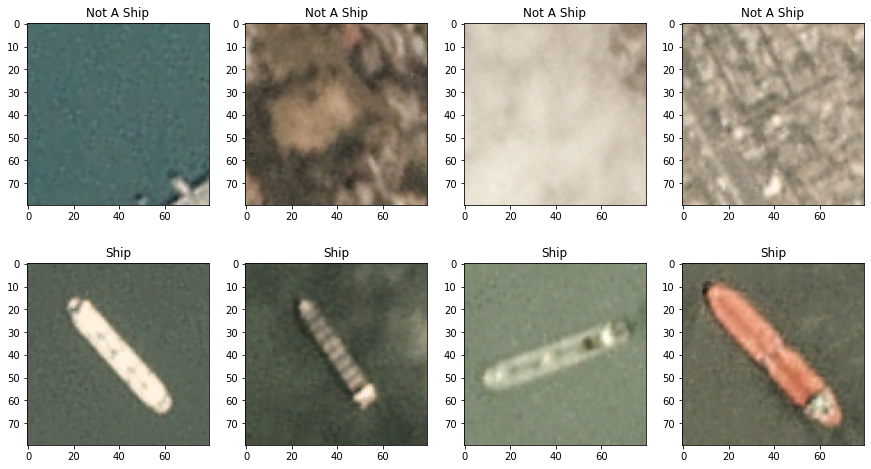

In [10]:
def plot(a,b):

    plt.figure(figsize=(15, 15))
    plt.subplot(2,4,1)
    plt.title('Not A Ship')
    plt.imshow(a[0])
    plt.subplot(2,4,2)
    plt.title('Not A Ship')
    plt.imshow(a[1])
    plt.subplot(2,4,3)
    plt.title('Not A Ship')
    plt.imshow(a[2])
    plt.subplot(2,4,4)
    plt.title('Not A Ship')
    plt.imshow(a[3])
    plt.subplot(2,4,5)
    plt.title('Ship')
    plt.imshow(b[0])
    plt.subplot(2,4,6)
    plt.title('Ship')
    plt.imshow(b[1])
    plt.subplot(2,4,7)
    plt.title('Ship')
    plt.imshow(b[2])
    plt.subplot(2,4,8)
    plt.title('Ship')
    plt.imshow(b[3])
    plt.subplots_adjust(bottom=0.3, top=0.7, hspace=0.25)

plot(imgs_0, imgs_1)

In [11]:
# Normalizing the X values

X_reshaped = X_reshaped / 255

In [12]:
# Doing the initial train/test split on the reshaped values

X_train_full, X_test, y_train_full, y_test = train_test_split(X_reshaped, y_reshaped, test_size=0.20, random_state=42)

# Creating the validation set

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [13]:
X_train.shape

(2400, 80, 80, 3)

In [14]:
y_train.shape

(2400, 2)

In [15]:
X_val.shape

(800, 80, 80, 3)

In [16]:
y_val.shape

(800, 2)

In [17]:
X_test.shape

(800, 80, 80, 3)

In [18]:
y_test.shape

(800, 2)

In [19]:
model = Sequential()
model.add(Flatten(input_shape=[80, 80, 3]))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [20]:
# Training the model

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Train on 2400 samples, validate on 800 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/20
2400/2400 [==============================] - 5s 2ms/sample - loss: 0.7859 - acc: 0.7500 - val_loss: 0.6931 - val_acc: 0.7513

In [21]:
model.evaluate(X_test, y_test)


800/800 [==============================] - 1s 2ms/sample - loss: 0.6931 - acc: 0.7387

[0.6931471824645996, 0.73875]

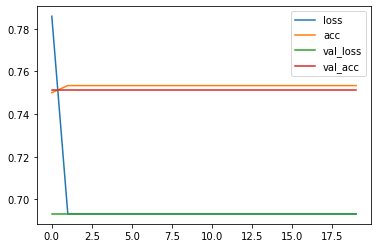

In [22]:
pd.DataFrame(history.history).plot();